#  Plot comparisons

## TODOs
* Consider adoption of postopus
* PUT RESULTS DIR UNDER VERSION CONTROL, in a submodule

## Observations
* All kerker results look considerably worse. Should:
    * Rebase the branch
    * Check I've got the files the right way round
    * Check input settings

## Settings
* I didn't specify smearing, but apparently it is used? https://octopus-code.org/documentation/13/variables/states/smearing/
  0.1 eV == 0.0735 Ry, so actually larger than used in the real-space paper => Should be plenty.


Issues: 
* Mixing the potential, rather than the density. 

Next Set of Runs:
* Do so without rebasing
* Mix density rather than potential
* Also try with kerker parameter increased from 1 to 2


In [1]:
import matplotlib.pyplot as plt

""" Found with:

import os
from pathlib import Path

notebook_dir = os.path.abspath(os.path.dirname("__file__"))
root = os.path.join(notebook_dir, '..', 'results')

file_list = ["".join(s + '_' for s in filename.split('_')[:-1])[:-1] for filename in os.listdir(Path(root, 'no_preconditioning'))]
file_list = sorted(list(set(file_list)))
print(file_list)
"""

# All systems
all_systems = ['1ALA', '2ALA', '2Dharmonic', '3ALA', '4ALA', 'ASC', 'Cr3', 'Fe_cubic', 'Fe_primitive', 'N_GNF', 'NiO', 'Si', 
               'Si001_1x1_2H', 'TiO2', 'WSe2', 'benzene', 'beta-cyclodextrin', 'betaine', 'methane', 'oxyluciferin', 'polyFePc', 'tetraazacubane']

In [45]:
# import os
# 
# """Parser and plotting functions for convergence comparison
# """
# import itertools
# import math
# import matplotlib.pyplot as plt
# import numpy as np
# from pathlib import Path
# from typing import List, Tuple, Dict
# 
# %load_ext autoreload
# %autoreload 2
# 
# from oct_utils import parse_convergence_calculations, initialise_subplot
# 
# 
# def parse_wrapper(subdirectories: List[str]) -> Tuple[Dict[str, list], dict]:
#     """ Parse data from convergence files into a dictionary.
# 
#     Written to work with the plotting structure in this cell.
#     
#     Keys are system names and values are lists of dictionaries.
#     Each list corresponds to all calculations performed for a given system:
#     Specifically 2, one without preconditioning and one with preconditioning.
#     As well as data to plot, each dict should contain plotting information (see function body). 
# 
#     :param subdirectories: Expect final subdirectories in which the calculations where performed i.e.'1ALA_broyden'
#     :return: 
#     """
#     notebook_dir = os.path.abspath(os.path.dirname("__file__"))
#     root = os.path.join(notebook_dir, '..', 'results')
# 
#     no_pre_sys_calcs: dict = parse_convergence_calculations([f'{root}/no_preconditioning/{s}' for s in subdirectories])
#     pre_sys_calcs: dict = parse_convergence_calculations([f'{root}/preconditioning/{s}' for s in subdirectories])
# 
#     # Plot options for no preconditioner and preconditioner calculations, respectively.
#     plot_opts1 = {'label': 'No P(r)',
#                  'ls': '-',
#                  'lw': 2,
#                  'color': 'red',
#                  }
#     plot_opts2 = {'label': 'P(r)',
#                  'ls': '--',
#                  'lw': 2,
#                  'color': 'blue',
#                  }
# 
#     # Initialise dicts
#     name = lambda s: "".join(x + '_' for x in s.split('_')[:-1])[:-1]
#     system_calcs = {name(s): [] for s in subdirectories}
#     missing_calcs = {'preconditioned': [], 'no preconditioning': []}
# 
#     for subdir in subdirectories:
#         subnames = Path(subdir).name.split('_')
#         mixer = subnames.pop()
#         system_name = "".join(s + '_' for s in subnames)[:-1]
#         
#         try: 
#             calculation = no_pre_sys_calcs[system_name]
#             calculation.update({'preconditioning': False,
#                                 'xlabel': 'N SCF Iterations', 
#                                 'ylabel': 'Relative Change \nin Density (log)', 
#                                 'plot_options': plot_opts1
#                                 })
#             system_calcs[system_name].append(calculation)
#         except KeyError:
#             system_calcs[system_name].append({'preconditioning': False,
#                                 'xlabel': 'N SCF Iterations', 
#                                 'ylabel': 'Relative Change \nin Density (log)', 
#                                 'plot_options': plot_opts1
#                                 })
#             missing_calcs['no preconditioning'].append(subdir)
#             
#         try: 
#             calculation = pre_sys_calcs[system_name]
#             calculation.update({'preconditioning': True,
#                                 'xlabel': 'N SCF Iterations', 
#                                 'ylabel': 'Relative Change \nin Density (log)', 
#                                 'plot_options': plot_opts2
#                                })
#             system_calcs[system_name].append(calculation)
#         except KeyError:
#             system_calcs[system_name].append({'preconditioning': True,
#                                 'xlabel': 'N SCF Iterations', 
#                                 'ylabel': 'Relative Change \nin Density (log)', 
#                                 'plot_options': plot_opts2
#                                })
#             missing_calcs['preconditioning'].append(subdir)
#         
#     return system_calcs, missing_calcs
# 
# 
# def plot_convergence(systems: List[str], system_calcs: Dict[str, list], n_cols: int, common_settings: dict):
#     """Plot kerker convergence against ground state with no preconditioning.
#         
#     Note, only have access to mixer info if `system_calcs[system_name]` was able to be parsed      
# 
#     TODO(Alex) Note, the font sizes etc, should scale with the number of cols per row.
#     Effectively hard-coded for 2 columns.
# 
#     :param systems: 
#     :param system_calcs: 
#     :param n_cols: 
#     :return: 
#     """
#     n_systems = len(systems)
#     n_rows = math.ceil(n_systems/ n_cols)
#     fig, axes = initialise_subplot(n_systems, n_cols=n_cols)
#     
#     # Initialise counters
#     empty_lims = 0, 0
#     i_cmp = -1
#     
#     map_index_to_name = {i: name for i, name in enumerate(system_calcs.keys())}
#     
#     for i, j in itertools.product(range(n_rows), range(n_cols)):
#         i_cmp += 1
#     
#         # Exit when last entry is reached.
#         if i_cmp > len(system_calcs) - 1:
#             empty_lims = i, j
#             break
#     
#         # All calculations for ith system
#         name = map_index_to_name[i_cmp]
#         calculations = system_calcs[name]
#     
#         # Plot calculations for a given system
#         for calc in calculations:
#             try:
#                 data = calc.pop('data')
#                 axes[i, j].plot(data[:, 0], data[:, 1], **calc['plot_options'])
#             except KeyError:
#                 calc_type = 'preconditioning' if calc['preconditioning'] else 'no preconditioning'
#                 print(f'No data for {name} computed with {calc_type}')
#     
#         # Scales
#         axes[i, j].set_yscale('log')
#     
#         # Ticks
#         axes[i, j].tick_params(axis='both', which='major', labelsize=common_settings['label_size'])
#         axes[i, j].tick_params(axis='both', which='minor', labelsize=common_settings['label_size'])
#     
#         # Labels
#         axes[i, j].set_xlabel(calc['xlabel'], fontsize=common_settings['font_size'])
#         axes[i, j].set_ylabel(calc['ylabel'], fontsize=common_settings['font_size'])
#         axes[i, j].legend(prop={'size': common_settings['legend_fsize']})
#         axes[i, j].set_title(f'{name}', fontsize=common_settings['font_size'])
#     
#     # Remove any empty subplots
#     if empty_lims != (0, 0):
#         for i, j in itertools.product(range(empty_lims[0], n_rows), range(empty_lims[1], n_cols)):
#             axes[i, j].remove()
# 
# 
# 
# """SCF Convergence on Benchmark Suite, with and without Preconditioning
# """
# systems = all_systems
# mixer = 'broyden'
# n_cols = 2
# common_settings = {'label_size': 14, 'font_size': 14, 'legend_fsize': 14}
# 
# # Parse data
# # Prior naming convention:
# # subdirectories = [f'{system}_{mixer}' for system in systems]
# subdirectories = systems
# system_calcs, missing_calcs = parse_wrapper(subdirectories)
# 
# print('Missing calculations:')
# print(missing_calcs)
# 
# # Plot calculations
# plot_convergence(systems, system_calcs, n_cols, common_settings)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import itertools
import math
import matplotlib.pyplot as plt
from typing import List, Dict

from oct_utils import initialise_subplot


def plot_convergence(system_calcs: Dict[str, list], n_cols: int, common_settings: dict):
    """Plot kerker convergence against ground state with no preconditioning.

    TODO(Alex) Note, the font sizes etc, should scale with the number of cols per row.
    Effectively hard-coded for 2 columns.

    :param systems: 
    :param system_calcs: 
    :param n_cols: 
    :return: 
    """
    n_systems = len(systems)
    n_rows = math.ceil(n_systems/ n_cols)
    fig, axes = initialise_subplot(n_systems, n_cols=n_cols)

    # Initialise counters
    empty_lims = 0, 0
    i_cmp = -1

    map_index_to_name = {i: name for i, name in enumerate(system_calcs.keys())}

    for i, j in itertools.product(range(n_rows), range(n_cols)):
        i_cmp += 1

        # Exit when last entry is reached.
        if i_cmp > len(system_calcs) - 1:
            empty_lims = i, j
            break

        # All calculations for ith system
        name = map_index_to_name[i_cmp]
        calculations = system_calcs[name]

        # Plot calculations for a given system
        for calc in calculations:
            try:
                data = calc.pop('data')
                axes[i, j].plot(data[:, 0], data[:, 1], **calc['plot_options'])
            except KeyError:
                calc_type = 'preconditioning' if calc['preconditioning'] else 'no preconditioning'
                print(f'No data for {name} computed with {calc_type}')

        # Scales
        axes[i, j].set_yscale('log')

        # Ticks
        axes[i, j].tick_params(axis='both', which='major', labelsize=common_settings['label_size'])
        axes[i, j].tick_params(axis='both', which='minor', labelsize=common_settings['label_size'])

        # Labels
        axes[i, j].set_xlabel(common_settings['xlabel'], fontsize=common_settings['font_size'])
        axes[i, j].set_ylabel(common_settings['ylabel'], fontsize=common_settings['font_size'])
        axes[i, j].legend(prop={'size': common_settings['legend_fsize']})
        axes[i, j].set_title(f'{name}', fontsize=common_settings['font_size'])

    # Remove any empty subplots
    if empty_lims != (0, 0):
        for i, j in itertools.product(range(empty_lims[0], n_rows), range(empty_lims[1], n_cols)):
            axes[i, j].remove()
                    
    plt.tight_layout()
    
    if 'title' in common_settings:
        fig.suptitle(common_settings['title'])



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


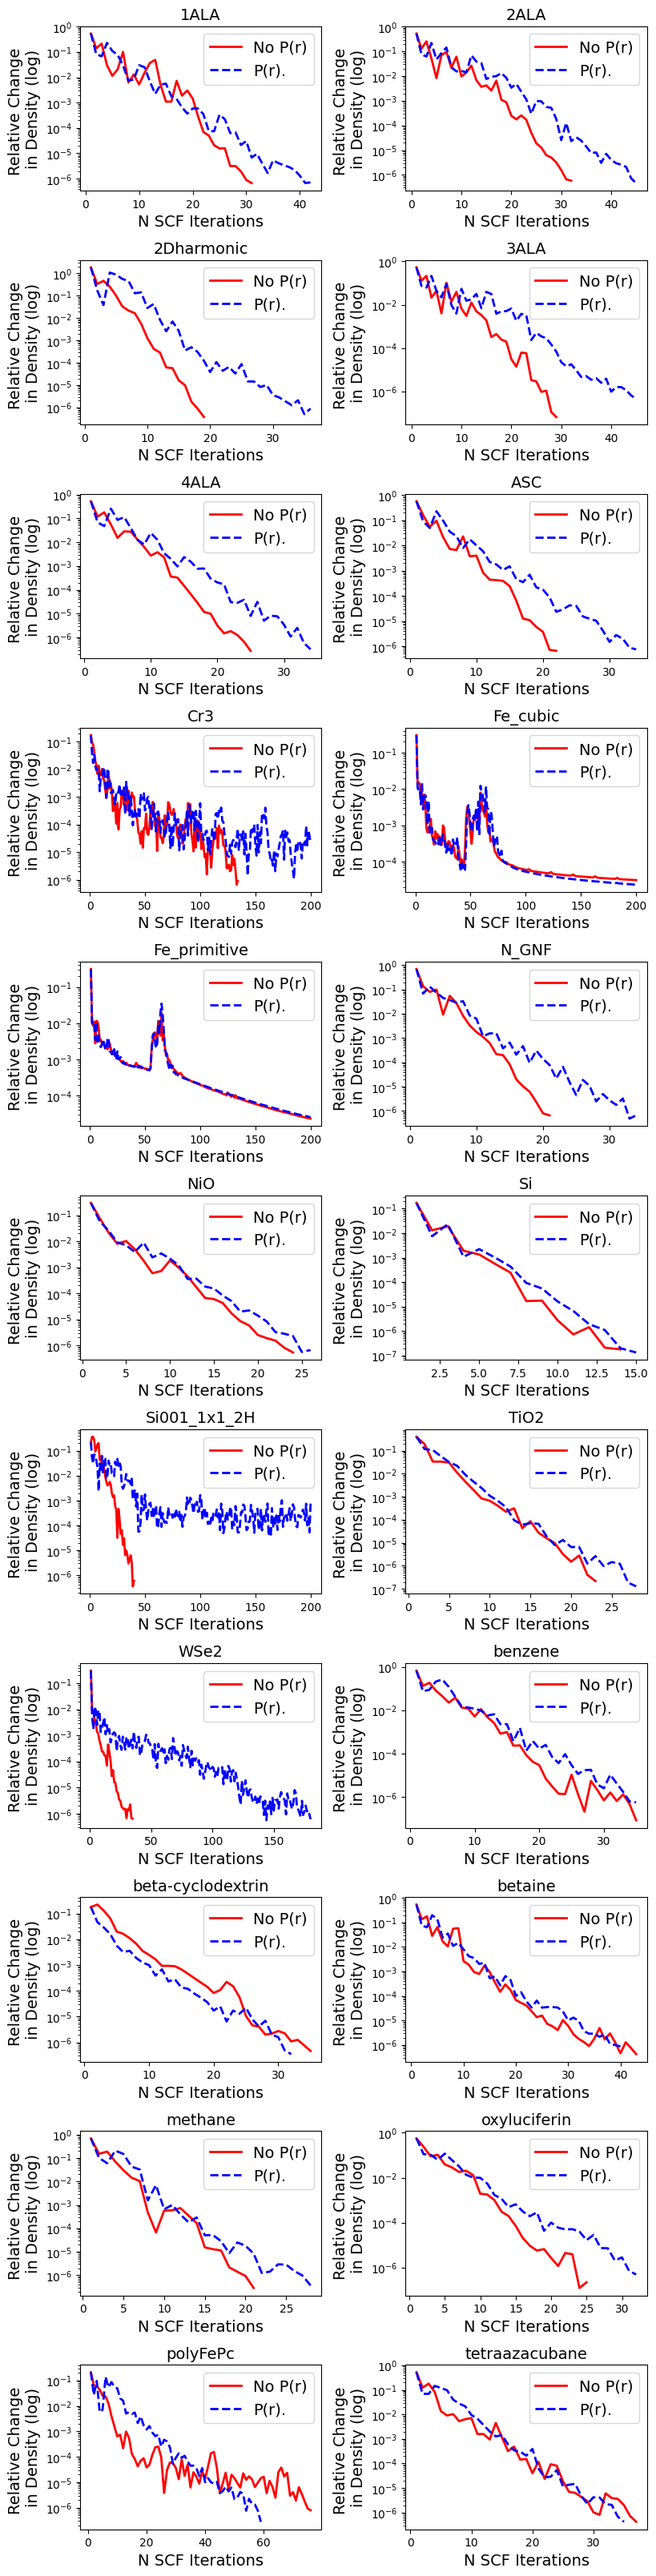

In [26]:
"""SCF Convergence on Benchmark Suite, with and without Preconditioning
"""
import os

from oct_utils import parse_convergence_calculations, initialise_subplot

%load_ext autoreload
%autoreload 2

notebook_dir = os.path.abspath(os.path.dirname("__file__"))
root = os.path.join(notebook_dir, '..', 'results')

# Settings
systems = all_systems
mixing_quantity = 'potential'

# No change in naming convention
subdirectories = systems

# 1. Preconditioning on the potentials, for Broyden mixing
no_pre_sys_calcs: dict = parse_convergence_calculations([f'{root}/no_preconditioning/broyden/{s}' for s in subdirectories])
pre_sys_calcs: dict = parse_convergence_calculations([f'{root}/preconditioning_{mixing_quantity}_defaults/{s}' for s in subdirectories])

# Plot options for no preconditioner and preconditioner calculations, respectively.
plot_opts1 = {'label': 'No P(r)',
             'ls': '-',
             'lw': 2,
             'color': 'red',
             }
plot_opts2 = {'label': 'P(r).',
             'ls': '--',
             'lw': 2,
             'color': 'blue',
             }

# Add plot options to the parsed data, and package all calculations together, per system
system_calcs = {s: [] for s in subdirectories}

# Systems should be consistent, else a parser error will be thrown above
for system_name in no_pre_sys_calcs: 
    # No preconditioning
    no_pre_sys_calcs[system_name].update({'preconditioning': False, 'plot_options': plot_opts1})
    system_calcs[system_name].append(no_pre_sys_calcs[system_name])
    
    # Preconditioning
    pre_sys_calcs[system_name].update({'preconditioning': True, 'plot_options': plot_opts2})
    system_calcs[system_name].append(pre_sys_calcs[system_name])

    
# Plot calculations
n_cols = 2
common_settings = {'label_size': 10, 
                   'font_size': 14, 
                   'legend_fsize': 14,                                 
                   'xlabel': 'N SCF Iterations', 
                   'ylabel': 'Relative Change \nin Density (log)'
                   #'title': "Effect of Kerker preconditioning, mixing with potentials"
                   # Cannot get it to not overlap the subplots
                   }

plot_convergence(system_calcs, n_cols, common_settings)




The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


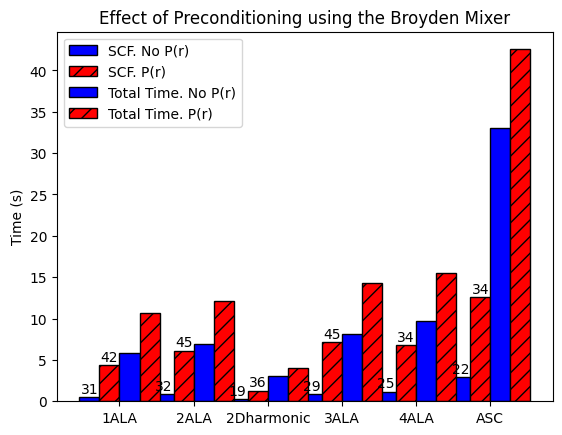

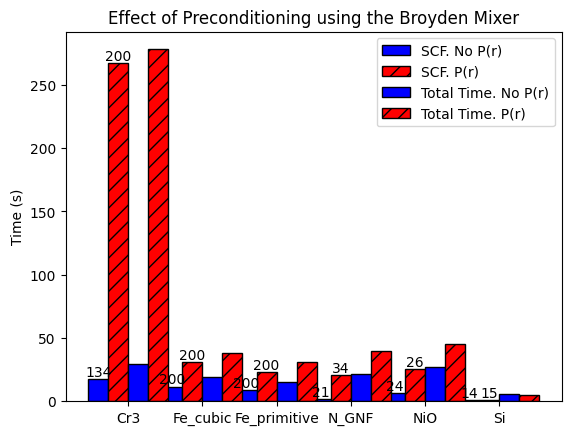

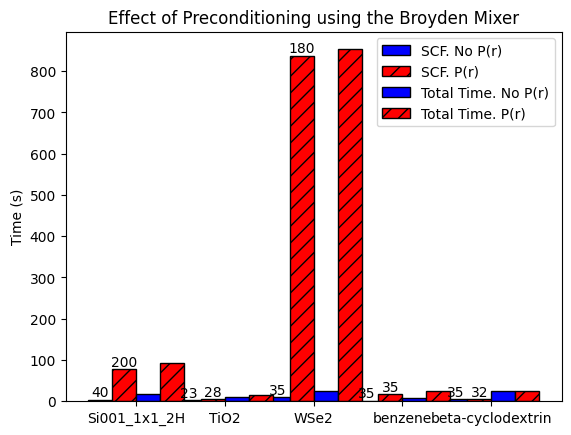

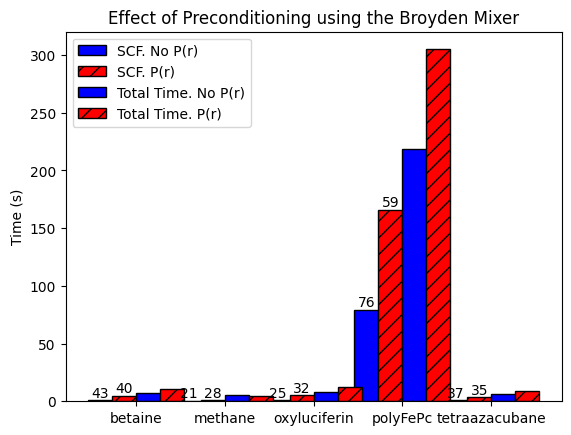

In [21]:
"""

TODOs
Clean this cell up
"""
%load_ext autoreload
%autoreload 2

from typing import List

from oct_utils import parse_profiling, ConvergenceData, bar_plot


def bar_chart_data_single_field(files, field1: str, field2: str):
    """
    Return a single data field, for all systems
    :param files: 
    :return: 
    """
    values = []
    for file in files:
        data = parse_profiling(file)
        values.append(data['cumulative'][field1][field2])
    return values


def number_of_scf_iterations(files) -> List[int]:
    """ Wrapper util
    :param files: 
    :return: 
    """
    n_scf = []
    for file in files:
        convergence = ConvergenceData(file)
        n_scf.append(convergence.n_scf_iterations())
    return n_scf
    

def package_bar_data(files) -> tuple:
    """
    
    :param root: 
    :param systems: 
    :param mixer: 
    :return: 
    """
    scf_no_pre_values = bar_chart_data_single_field(files['without'], 'SCF_CYCLE', 'TOTAL_TIME')
    total_no_pre_values = bar_chart_data_single_field(files['without'], 'COMPLETE_RUN', 'TOTAL_TIME')
    nscf_no_pre = number_of_scf_iterations(files['without'])
    
    scf_pre_values = bar_chart_data_single_field(files['with'], 'SCF_CYCLE', 'TOTAL_TIME')
    total_pre_values = bar_chart_data_single_field(files['with'], 'COMPLETE_RUN', 'TOTAL_TIME')
    nscf_pre = number_of_scf_iterations(files['with'])
    
    fields = [{'data': scf_no_pre_values, 'label': 'SCF. No P(r)', 'color': 'b', 'hatch': '', 'edgecolor': 'black'},
              {'data': scf_pre_values, 'label': 'SCF. P(r)', 'color': 'r', 'hatch': '//', 'edgecolor': 'black'},
              {'data': total_no_pre_values, 'label': 'Total Time. No P(r)', 'color': 'b', 'hatch': '', 'edgecolor': 'black'},
              {'data': total_pre_values, 'label': 'Total Time. P(r)', 'color': 'r', 'hatch': '//', 'edgecolor': 'black'}]

    # Apply labels to bars, for the SCF fields
    # where the field index is defined by the order in fields, above
    bar_labels = [{'field': 0, 'labels': nscf_no_pre}, {'field': 1, 'labels': nscf_pre}]

    return fields, bar_labels


def create_batches(n: int, n_batches: int):
    """Batching without load-balancing
    """
    batch_size = [math.ceil(n / n_batches)] * (n_batches - 1)
    # Last batch size
    batch_size.append(n - sum(batch_size))
    assert sum(batch_size) == n
    
    # Start and end indices per batch
    indices = []
    index = 0
    for bs in batch_size:
        indices.append((index, index + bs - 1))
        index += bs
    
    return indices


# Parse and plot
notebook_dir = os.path.abspath(os.path.dirname("__file__"))
root = os.path.join(notebook_dir, '..', 'results')

# TODO(Alex) Not sure the batching is working. Could also make the plot wider
# n_plots = 3
# indices = create_batches(len(systems), n_batches=n_plots)
# 
# # Batch the plots up, so they fit
# for i1, i2 in indices:
#     systems = all_systems[i1:i2]
#     fields, bar_labels = package_bar_data(root, systems, 'broyden')
#     title = 'Effect of Preconditioning using the Broyden Mixer'
#     bar_plot(systems, fields, bar_labels=bar_labels, title=title)

# Manual batching
files = {}
# TODO(Alex) Group systems with similar timings.
systems = ['1ALA', '2ALA', '2Dharmonic', '3ALA', '4ALA', 'ASC']
files['without'] = [f'{root}/no_preconditioning/broyden/{system}' for system in systems]
files['with'] = [f'{root}/preconditioning_potential_defaults/{system}' for system in systems]
fields, bar_labels = package_bar_data(files)
title = 'Effect of Preconditioning using the Broyden Mixer'
bar_plot(systems, fields, bar_labels=bar_labels, title=title)

systems = ['Cr3', 'Fe_cubic', 'Fe_primitive', 'N_GNF', 'NiO', 'Si']
files['without'] = [f'{root}/no_preconditioning/broyden/{system}' for system in systems]
files['with'] = [f'{root}/preconditioning_potential_defaults/{system}' for system in systems]
fields, bar_labels = package_bar_data(files)
title = 'Effect of Preconditioning using the Broyden Mixer'
bar_plot(systems, fields, bar_labels=bar_labels, title=title)

systems = ['Si001_1x1_2H', 'TiO2', 'WSe2', 'benzene', 'beta-cyclodextrin']
files['without'] = [f'{root}/no_preconditioning/broyden/{system}' for system in systems]
files['with'] = [f'{root}/preconditioning_potential_defaults/{system}' for system in systems]
fields, bar_labels = package_bar_data(files)
title = 'Effect of Preconditioning using the Broyden Mixer'
bar_plot(systems, fields, bar_labels=bar_labels, title=title)

systems = ['betaine', 'methane', 'oxyluciferin', 'polyFePc', 'tetraazacubane']
files['without'] = [f'{root}/no_preconditioning/broyden/{system}' for system in systems]
files['with'] = [f'{root}/preconditioning_potential_defaults/{system}' for system in systems]
fields, bar_labels = package_bar_data(files)
title = 'Effect of Preconditioning using the Broyden Mixer'
bar_plot(systems, fields, bar_labels=bar_labels, title=title)
    


In [25]:
""" Timings in Table Form

More stats of interest:
* | N SCF steps with P(r) | Converged with P(r) | N SCF steps without P(r) | Converged w/o P(r)
"""
import numpy as np
import pandas as pd

notebook_dir = os.path.abspath(os.path.dirname("__file__"))
root = os.path.join(notebook_dir, '..', 'results')

# 'cumulative' or 'self'
time_type = 'cumulative'
# Subdirectory names for calculations
systems = all_systems
mixer = 'broyden'

# Create List[dict] for pandas
entries = []
stats = {'scf w': [], 'scf w/o': []}

for system in systems:
    system_name = system
    data_to_visualise = {'System': system_name, 'Mixer': mixer}
    
    data_no_pre = parse_profiling(f'{root}/no_preconditioning/{mixer}/{system}')[time_type]
    data_pre = parse_profiling(f'{root}/preconditioning_potential_defaults/{system}')[time_type]
    
    # TODO(Alex) Add n-atoms
    data_to_visualise.update({'SCF time w/o P(r)':   data_no_pre['SCF_CYCLE']['TOTAL_TIME'],
                              'SCF time w P(r)':      data_pre['SCF_CYCLE']['TOTAL_TIME'],
                              'Total time w/o P(r)': data_no_pre['COMPLETE_RUN']['TOTAL_TIME'],
                              'Total time w P(r)':    data_pre['COMPLETE_RUN']['TOTAL_TIME'],
                              'SCF Faster with P(r)?': data_no_pre['SCF_CYCLE']['TOTAL_TIME'] > data_pre['SCF_CYCLE']['TOTAL_TIME']}
                             )
    entries.append(data_to_visualise)
    
    # Collect some data for stats
    stats['scf w/o'].append(data_no_pre['SCF_CYCLE']['TOTAL_TIME'])
    stats['scf w'].append(data_pre['SCF_CYCLE']['TOTAL_TIME'])

# pd.set_option('display.width', 120)  # Set the overall display width w.r.t. n_characters
df = pd.DataFrame(entries)
print(df)
print()

# Compute some stats
print('Summary')
print('--------------')

n_entries = len(df)
speed_up = np.empty(shape=n_entries)
for i in range(n_entries):
    speed_up[i] = stats['scf w/o'][i] / stats['scf w'][i]

# Percentage that are slower, and by how much
slower = speed_up[speed_up < 1.]
if len(slower) == 0:
    print(f'{len(slower)} / {n_entries} have slower SCF time')
else:
    print(f'{len(slower)} / {n_entries} have slower SCF time, by an average of {np.mean(1. / slower)} x')

# Percentage that are faster, and by how much
faster = speed_up[speed_up >= 1.]
if len(faster) == 0:
    print(f'{len(faster)} / {n_entries} have faster SCF time')
else:
    print(f'{len(faster)} / {n_entries} have faster SCF time, by an average of {np.mean(faster)} x')





               System    Mixer  SCF time w/o P(r)  SCF time w P(r)  Total time w/o P(r)  Total time w P(r)  \
0                1ALA  broyden           0.509039         4.395924             5.794115          10.629287   
1                2ALA  broyden           0.894942         6.133612             6.931829          12.168131   
2          2Dharmonic  broyden           0.230795         1.301523             3.032109           4.038363   
3                3ALA  broyden           0.881210         7.186158             8.180632          14.323470   
4                4ALA  broyden           1.170387         6.792276             9.706996          15.545202   
5                 ASC  broyden           2.964514        12.565222            32.986634          42.552965   
6                 Cr3  broyden          17.346487       267.196857            29.742766         278.189991   
7            Fe_cubic  broyden          11.435899        30.882177            18.698727          38.223210   
8        F